# Plotting and Analyzing Light Curves of Eclipsing Binary Stars with `lightkurve`: Solutions

***

In [2]:
%matplotlib inline
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from astroquery.mast import Observations
import lightkurve as lk

***

### Exercise 1

Use the documentation linked above and the [FITS Headers](https://docs.astropy.org/en/stable/io/fits/usage/headers.html) documentation from astropy to answer the following questions:
1. Is the magnitude of this target included, and if so, what is it?
2. Is the mass of this target included, and if so, what is it? 
3. What was the mass determined in the RV catalog? (You'll need to go back to Part 1 of the tutorial to complete this step!)

In [3]:
# This bit of code is reproduced from the original notebook to create the variable lcfits
url='mast:HLSP/qlp/s0018/0000/0003/7328/3207/hlsp_qlp_tess_ffi_s0018-0000000373283207_tess_v01_llc.fits'
Observations.download_file(url)
filename=url.split('/')[-1]
lcfits=fits.open(filename)
# Exercise 1 Solutions:
print(lcfits[0].header['TESSMAG'])
print(lcfits[0].header['MASS'])

INFO: Found cached file /Users/jkamenetzky/GitHub/notebooks-stsci/notebooks/MAST/plot_analyze_with_lightkurve/hlsp_qlp_tess_ffi_s0018-0000000373283207_tess_v01_llc.fits with expected size 72000. [astroquery.query]
13.3269
-1.0


Answers:
1. The magnitude is 13.3269. 
2. The -1.0 means the mass is NOT included in the catalog. 
3. The mass from the RV catalog is 1.2 stellar masses.

## Additional Exercises

1. In Part 1 of the tutorial, `find _eclipse_candidates`, we created a for loop to search for TASOC and QLP observations using astroquery.mast Observations. Load the same `tbl` variable from that tutorial (a filtered version of [Price-Whelan et al. 2018 (AJ, 156, 1, 18)](https://ui.adsabs.harvard.edu/abs/2018AJ....156...18P/abstract) Table 4a, and create a loop to search for TASOC and QLP observation using lk.search_lightcurve instead. Which is faster? 

JRK note, this requires importing Vizier, so do above?

2. Choose another stellar system from PW+2018, plot the stitched light curve, and create the periodogram. Compare the period at maximum power found to the period derived from the radial velocity method.

In [6]:
# Additional Exercise 1 Solution: 
# First, this is the code from Part 1 of the tutorial to create the tbl variable. 
# We need one additional import
from astroquery.vizier import Vizier
v=Vizier(columns=['APOGEE','Per','M1','M2min','qmin','RAJ2000', 'DEJ2000'],
           column_filters={"Per":"<100","Conv":"=1"})
v.ROW_LIMIT = -1
catalogs=v.get_catalogs('J/AJ/156/18')
tbl=catalogs[2]
tbl.sort('qmin')
tbl.reverse()
tbl=tbl[~tbl['qmin'].mask]
# Like in Part 1, add columns to tbl that we can use to indicate if a TASOC
# or QLP light curve is available. 
n=len(tbl)
col_TASOC = Table.Column(name='TASOC',data=np.full(n,False))
col_QLP = Table.Column(name='QLP',data=np.full(n,False))
if 'TASOC' not in tbl.colnames: 
    tbl.add_column(col_TASOC) # Can only add the column once.
else:
    tbl['TASOC']=col_TASOC
if 'QLP' not in tbl.colnames: 
    tbl.add_column(col_QLP)
else: 
    tbl['QLP']=col_QLP

In [5]:
# Now this loop looks similar to the one done in Part 1, but 
# using lk.search_lightcurve instead.
for i in range(0,n):
    coord=SkyCoord(ra=tbl['RAJ2000'].data[i]*u.degree, dec=tbl['DEJ2000'].data[i]*u.degree, frame='icrs')
    print('Searching for index '+str(i)+', coordinate: '+coord.to_string('decimal'))
    
    # Though you can search just by author="QLP" and author="TASOC", 
    # to be comparable to Part 1, we'll search for all observations. 
    obs_tbl=lk.search_lightcurve(coord)

    # Instead of "provenance_name" the column we need here is "Author"
    # Also, we need to check that there are any returned at all!
    # Most tables will be empty, unlike with the Observations search.
    if len(obs_tbl)==0: continue
    if np.any(obs_tbl.author.data=='TASOC'):
        tbl['TASOC'][i]=True
        print('Found TASOC light curve for index '+str(i)+', coordinate: '+coord.to_string('decimal'))
    if np.any(obs_tbl.author.data=='QLP'):
        tbl['QLP'][i]=True
        print('Found QLP light curve for index '+str(i)+', coordinate: '+coord.to_string('decimal'))
print('Done.')

Searching for index 0, coordinate: 304.633 19.8953


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (304.633241, 19.895283)>".


Searching for index 1, coordinate: 2.23864 73.6905
Found QLP light curve for index 1, coordinate: 2.23864 73.6905
Searching for index 2, coordinate: 2.36622 1.76161


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.366216, 1.761607)>".


Searching for index 3, coordinate: 112.115 22.428


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (112.115125, 22.428013)>".


Searching for index 4, coordinate: 20.2619 84.5251


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (20.261862, 84.525131)>".


Searching for index 5, coordinate: 70.3178 58.9265


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (70.317793, 58.926521)>".


Searching for index 6, coordinate: 2.67515 1.86847


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.675149, 1.868474)>".


Searching for index 7, coordinate: 107.632 7.21625


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (107.632065, 7.216252)>".


Searching for index 8, coordinate: 294.207 38.2235
Searching for index 9, coordinate: 299.228 22.1054


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (299.228079, 22.10541)>".


Searching for index 10, coordinate: 94.5524 31.8039


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (94.552351, 31.803905)>".


Searching for index 11, coordinate: 122.85 32.8616
Found QLP light curve for index 11, coordinate: 122.85 32.8616
Searching for index 12, coordinate: 112.088 22.5467


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (112.088243, 22.546661)>".


Searching for index 13, coordinate: 323.17 12.4008


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (323.169642, 12.400843)>".


Searching for index 14, coordinate: 292.561 26.2298


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (292.56102, 26.229767)>".


Searching for index 15, coordinate: 273.55 -0.00303


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (273.550415, -0.00303)>".


Searching for index 16, coordinate: 80.6826 43.0118


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (80.682587, 43.011822)>".


Done.


In [7]:
# Alternatively, we could JUST search for QLP, TASOC by name.
# This requires two separate searches. 
for i in range(0,n):
    coord=SkyCoord(ra=tbl['RAJ2000'].data[i]*u.degree, dec=tbl['DEJ2000'].data[i]*u.degree, frame='icrs')
    print('Searching for index '+str(i)+', coordinate: '+coord.to_string('decimal'))

    obs_tbl=lk.search_lightcurve(coord,author='TASOC')
    if len(obs_tbl)>0: 
        tbl['TASOC'][i]=True
        print('Found TASOC light curve for index '+str(i)+', coordinate: '+coord.to_string('decimal'))

    obs_tbl=lk.search_lightcurve(coord,author='QLP')
    if len(obs_tbl)>0: 
        tbl['QLP'][i]=True
        print('Found QLP light curve for index '+str(i)+', coordinate: '+coord.to_string('decimal'))
        
print('Done.')

Searching for index 0, coordinate: 304.633 19.8953


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (304.633241, 19.895283)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (304.633241, 19.895283)>".


Searching for index 1, coordinate: 2.23864 73.6905


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.238636, 73.690475)>".


Found QLP light curve for index 1, coordinate: 2.23864 73.6905
Searching for index 2, coordinate: 2.36622 1.76161


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.366216, 1.761607)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.366216, 1.761607)>".


Searching for index 3, coordinate: 112.115 22.428


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (112.115125, 22.428013)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (112.115125, 22.428013)>".


Searching for index 4, coordinate: 20.2619 84.5251


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (20.261862, 84.525131)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (20.261862, 84.525131)>".


Searching for index 5, coordinate: 70.3178 58.9265


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (70.317793, 58.926521)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (70.317793, 58.926521)>".


Searching for index 6, coordinate: 2.67515 1.86847


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.675149, 1.868474)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (2.675149, 1.868474)>".


Searching for index 7, coordinate: 107.632 7.21625


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (107.632065, 7.216252)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (107.632065, 7.216252)>".


Searching for index 8, coordinate: 294.207 38.2235


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (294.206988, 38.223454)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (294.206988, 38.223454)>".


Searching for index 9, coordinate: 299.228 22.1054


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (299.228079, 22.10541)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (299.228079, 22.10541)>".


Searching for index 10, coordinate: 94.5524 31.8039


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (94.552351, 31.803905)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (94.552351, 31.803905)>".


Searching for index 11, coordinate: 122.85 32.8616


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (122.850404, 32.861553)>".


Found QLP light curve for index 11, coordinate: 122.85 32.8616
Searching for index 12, coordinate: 112.088 22.5467


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (112.088243, 22.546661)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (112.088243, 22.546661)>".


Searching for index 13, coordinate: 323.17 12.4008


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (323.169642, 12.400843)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (323.169642, 12.400843)>".


Searching for index 14, coordinate: 292.561 26.2298


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (292.56102, 26.229767)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (292.56102, 26.229767)>".


Searching for index 15, coordinate: 273.55 -0.00303


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (273.550415, -0.00303)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (273.550415, -0.00303)>".


Searching for index 16, coordinate: 80.6826 43.0118


No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (80.682587, 43.011822)>".
No data found for target "<SkyCoord (ICRS): (ra, dec) in deg
    (80.682587, 43.011822)>".


Done.


For the writer of this tutorial, the method in Part 1 took about X seconds, the first method shown here took about 2 minutes, and the second method shown here took about 1.5 seconds. It is generally faster to specify the types of observations being search for than to search for all observations and narrow down the list afterwards. 

PW+ 2018 period: 23.04126 days
Period at Max Power: 0.6565301621602919 d


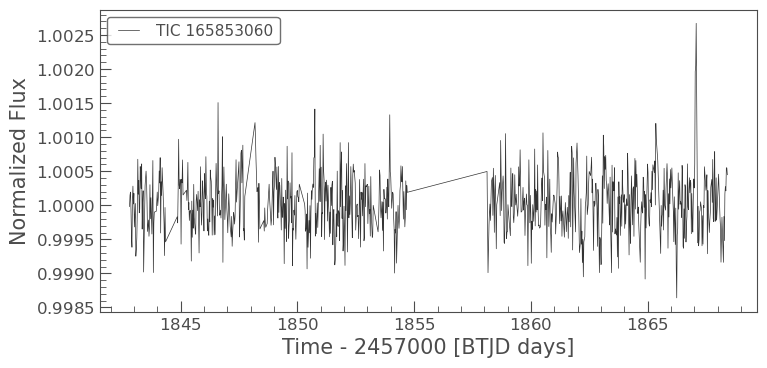

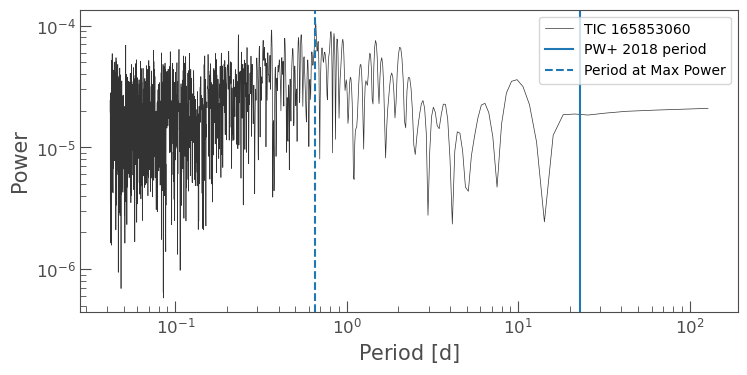

In [8]:
# Additional Exercise 2 Solution:
# The other system from tbl that has a QLP light curve is APOGEE 2M08112409+3251415, 
# with a reported period of 23.04126 days and RA = 122.850404, Dec = 32.861553
# If you chose to sort PW+2018 another way, there are other systems available with light curves.
coord=SkyCoord(ra=122.850404*u.degree, dec=32.861553*u.degree, frame='icrs')
per=23.04126
search_result=lk.search_lightcurve(coord,author="QLP") # Find the lightcurves
lc_collection=search_result.download_all()             # Download all
lc_stitched=lc_collection.stitch()                     # Stitch all together
lc_stitched=lc_stitched[lc_stitched['quality']==0]     # Only select data points with quality = 0 
lc_stitched.flux=lc_stitched['kspsap_flux']            # Replace flux, error column with kspsap_flux
lc_stitched.flux_err=lc_stitched['kspsap_flux_err']
lc_stitched.meta['FLUX_ORIGIN']='kspsap_flux'
lc_stitched.plot()                                     # Plot the lightcurve
pg=lc_stitched.to_periodogram()                        # Create the periodogram
# Now view the periodogram
ax=pg.plot(view='period',scale='log')
ax.axvline(per,label='PW+ 2018 period')
ax.axvline(pg.period_at_max_power.value,label='Period at Max Power',linestyle='--')
ax.legend()
print('PW+ 2018 period: '+str(per)+' days')
print('Period at Max Power: '+str(pg.period_at_max_power))

Again, the eclipse signal is not found in this lightcurve. 

***

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 